# Fine-tuning with Dreambooth








## Installing the libraries

In [ ]:
#-------------------------installing jax-------------------------

!pip install "jax[cuda12_local]==0.4.23" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html

In [ ]:
#-------------------------installing torch with cuda(gpu support)-------------------------

!pip install torch==2.1.0+cu121 torchvision==0.16.0+cu121 torchaudio==2.1.0 torchtext==0.16.0+cpu torchdata==0.7.0 --index-url https://download.pytorch.org/whl/cu121

In [ ]:
 # connecting to github and downloading the diffusers repository
!wget -q https://github.com/ShivamShrirao/diffusers/raw/main/examples/dreambooth/train_dreambooth.py
!wget -q https://github.com/ShivamShrirao/diffusers/raw/main/scripts/convert_diffusers_to_original_stable_diffusion.py
%pip install -qq git+https://github.com/ShivamShrirao/diffusers
%pip install -q -U --pre triton
%pip install -q accelerate transformers ftfy bitsandbytes gradio natsort safetensors xformers

In [8]:
#-------------------------mounting google drive-------------------------
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


## Loading the model


> Terms of use

* https://huggingface.co/spaces/CompVis/stable-diffusion-license


In [1]:
#-------------------------setting up the paths-------------------------
model_sd = "runwayml/stable-diffusion-v1-5"
output_dir = "/content/drive/MyDrive/content/stable_diffusion_weights/zwx"

In [2]:
#-------------------------creating the output directory-------------------------
!mkdir -p $output_dir

## Training

Three components are needed:
1. unique identifier
2. class name
3. images

Instance prompt
a photo of [unique identifier] [class name]

Class prompt
> a photo of [class name]

The instance prompt will be as follows:
> a photo of zwx person

As the subject is a person, the class prompt will be as follows:
> a photo of a person

In [3]:
#-------------------------training the model-------------------------
import os
import json

# Define concepts list
concepts_list = [
    {
        "instance_prompt": "zwx",
        "class_prompt": "photo of a person",
        "instance_data_dir": "/content/drive/MyDrive/content/data/zwx",
        "class_data_dir": "/content/drive/MyDrive/content/data/person"
    }
]

# Create directories if they don't exist
for c in concepts_list:
    os.makedirs(c["instance_data_dir"], exist_ok=True)
    os.makedirs(c["class_data_dir"], exist_ok=True)

# Save concepts list to JSON
with open("concepts_list.json", "w") as f:
    json.dump(concepts_list, f, indent=4)

# Verify directory contents
instance_dir = concepts_list[0]["instance_data_dir"]
class_dir = concepts_list[0]["class_data_dir"]

print("Instance directory contents:", os.listdir(instance_dir) if os.path.exists(instance_dir) else "Directory does not exist")
print("Class directory contents:", os.listdir(class_dir) if os.path.exists(class_dir) else "Directory does not exist")


Instance directory contents: ['thumb-1920-1137056.jpg', 'desktop-wallpaper-ana-de-armas-eye.jpg']
Class directory contents: ['0-ae5aee9e7d216a6b01ed56b425f08b263cc0804c.jpg', '1-59a3870a7aa844db882212b9cc4f0a3d417b7bac.jpg', '2-3d38046b584f4afed14248e4e8c490df097741f6.jpg', '3-fd8475e1865084dd1244dc6e416e11dd231731c7.jpg', '4-157456ab9dbef7a722124e24319a28d4dddd31cf.jpg', '5-01221124f40526a1c130139962788078eaa79caf.jpg', '6-6ac9feb7892445a08c5e8d99f4871d54e46492c9.jpg', '7-8767cf0c4e92c8ae922a70d73f3d706e70a1284f.jpg', '8-4b8fce785e7e12c141b7db4b4128bc61455cfe2b.jpg', '9-5fe06b1ad5f7387faacdc46f6376c3e1bdc94142.jpg', '10-a3fa714ad3bc1ddb2c5b5dfa899491fda6c60651.jpg', '11-03a7ac6b8789b1054c6242e0e00f6772ab71988f.jpg', '12-dbbd193dd2b6717c973b6f9b0dfc429ce7f365db.jpg', '13-0d58c52b80a9140def139e5b569e4edc09066af7.jpg', '14-8d87a30b87df772698534787f4f7100c5302428e.jpg', '15-16ff2ce4c83178770eb3de677ef5f4c4f340cfaf.jpg', '16-d7a7bfb9da7751d7a49d53debcc1e00ecd822a57.jpg', '17-5d62822b233edc

In [4]:

concepts_list = [
    {
        "instance_prompt": "zwx",
        "class_prompt": "photo of a person",
        "instance_data_dir": "/content/drive/MyDrive/content/data/zwx",
        "class_data_dir": "/content/drive/MyDrive/content/data/person"

    }
]

In [5]:
#-------------------------creating the output directory-------------------------
import json
import os
import random

for c in concepts_list:
  os.makedirs(c["instance_data_dir"], exist_ok=True)

In [6]:
with open("concepts_list.json", "w") as f:
  json.dump(concepts_list, f, indent=4)

### Parameters

In [8]:
#-------------------------training the model-------------------------

num_imgs = 10  # Number of images to train on
num_class_images = num_imgs * 12  # Number of images to train on per class
max_num_steps = num_imgs * 80 # Number of steps to train for
learning_rate = 1e-6 # 0.0000001 Learning rate
lr_warmup_steps = int(max_num_steps / 10) # Learning rate warmup steps
print(num_imgs, num_class_images, max_num_steps, learning_rate, lr_warmup_steps) 

10 120 800 1e-06 80


In [ ]:

!pip install --upgrade huggingface_hub
!pip install --upgrade diffusers
!pip install xformers



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.4/447.4 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 49.5 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.30.3
    Uninstalling diffusers-0.30.3:
      Successfully uninstalled diffusers-0.30.3
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 455, in run
    installed = install_given_reqs(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/__init__.py", line 70, in install_given_reqs
    requirement.install(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_install.py", line 851, in install
    install_wheel(
  Fi

In [ ]:
# this will read train_dreambooth.py and run the training process with specified parameters using a pretrained Stable Diffusion model,
# various training configurations, and hyperparameters.
!python3 train_dreambooth.py \ 
  --pretrained_model_name_or_path=$model_sd \
  --pretrained_vae_name_or_path="stabilityai/sd-vae-ft-mse" \
  --output_dir=$output_dir \
  --revision="main" \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --seed=777 \
  --resolution=512 \
  --train_batch_size=1 \
  --train_text_encoder \
  --mixed_precision="fp16" \
  --use_8bit_adam \
  --gradient_accumulation_steps=1 \
  --learning_rate=$learning_rate \
  --lr_scheduler="constant" \
  --lr_warmup_steps=80 \
  --num_class_images=$num_class_images \
  --sample_batch_size=4 \
  --max_train_steps=$max_num_steps \
  --save_interval=10000 \
  --save_sample_prompt="zwx" \
  --concepts_list="concepts_list.json"

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
2024-10-22 16:58:40.488688: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-22 16:58:40.807159: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-22 16:58:40.895423: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:

In [9]:
#-------------------------finding the weights directory-------------------------
from natsort import natsorted
from glob import glob
import os

weights_dir = natsorted(glob(output_dir + os.sep + '*'))[-1]
print('Weights directory: ', weights_dir)

Weights directory:  /content/drive/MyDrive/content/stable_diffusion_weights/zwx/800


In [10]:
#-------------------------converting the weights to the original model-------------------------
import os
import matplotlib.pyplot as plt
from PIL import Image

# Function to create a grid of images
def grid_img(imgs, rows=1, cols=3, scale=1): 
  assert len(imgs) == rows * cols

  w, h = imgs[0].size # Get image size
  w, h = int(w*scale), int(h*scale) # Scale image size

  grid = Image.new('RGB', size=(cols*w, rows*h)) # Create new image
  grid_w, grid_h = grid.size # Get grid size

  for i, img in enumerate(imgs): # Iterate over images
      img = img.resize((w,h), Image.ANTIALIAS) # Resize image
      grid.paste(img, box=(i%cols*w, i//cols*h)) # Paste image
  return grid

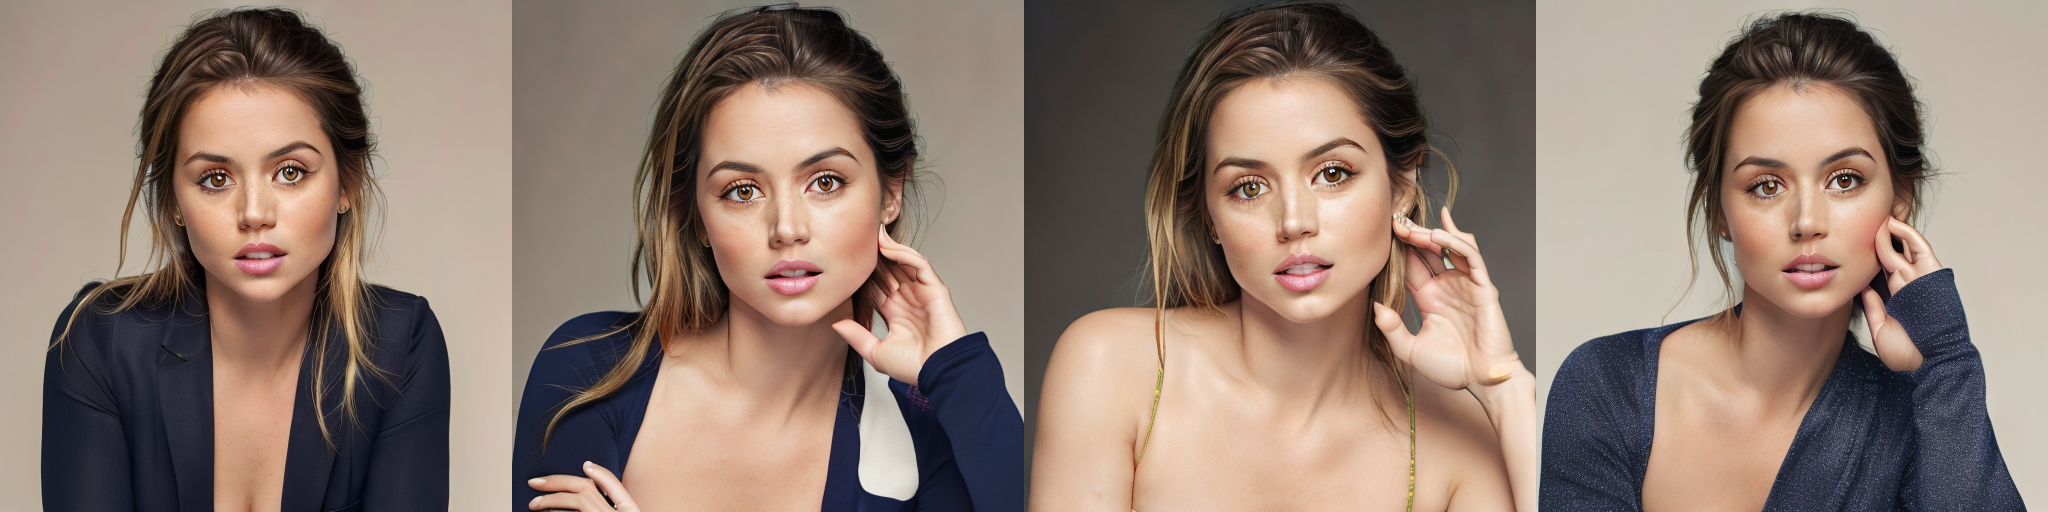

In [11]:
# Load images
weights_folder = output_dir
folders = sorted([f for f in os.listdir(weights_folder) if f != "0"], key = lambda x: int(x))

imgs_test = []


for imgs, folder in enumerate(folders): 
  folder_path = os.path.join(weights_folder, folder)
  image_folder = os.path.join(folder_path, "samples")
  images = [f for f in os.listdir(image_folder)]

  for i in images:
    img_path = os.path.join(image_folder, i)
    r = Image.open(img_path)
    imgs_test.append(r)

grid_img(imgs_test, rows=1, cols=4, scale=1)

## Convert the weights into (checkpoint)

In [12]:
ckpt_path = weights_dir + "/model.ckpt" 

half_arg = "--half" # fp16

!python convert_diffusers_to_original_stable_diffusion.py --model_path $weights_dir  --checkpoint_path $ckpt_path $half_arg 
print(f"Converted to ckpt and saved in {ckpt_path}")

python3: can't open file '/content/convert_diffusers_to_original_stable_diffusion.py': [Errno 2] No such file or directory
Converted to ckpt and saved in /content/drive/MyDrive/content/stable_diffusion_weights/zwx/800/model.ckpt


## Inference (tests)

In [13]:

import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, DDIMScheduler
from IPython.display import display

In [14]:
model_path = weights_dir
print(model_path)

/content/drive/MyDrive/content/stable_diffusion_weights/zwx/800


In [15]:
# Load the model
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16).to('cuda')

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [16]:
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config) # Load scheduler
pipe.enable_xformers_memory_efficient_attention() # Enable memory-efficient attention
seed = 777 # Seed

## Generating images

Seed: 1666101951


  0%|          | 0/30 [00:00<?, ?it/s]

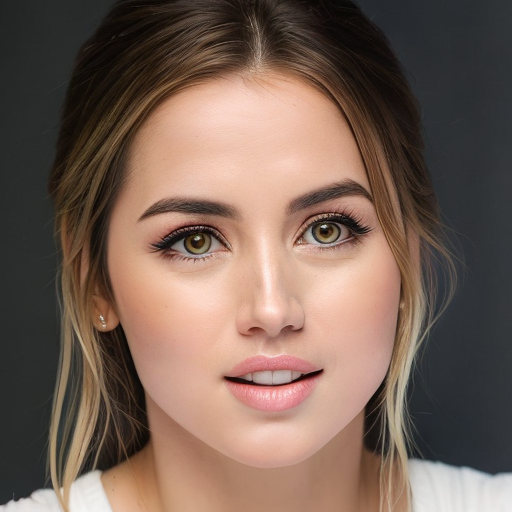

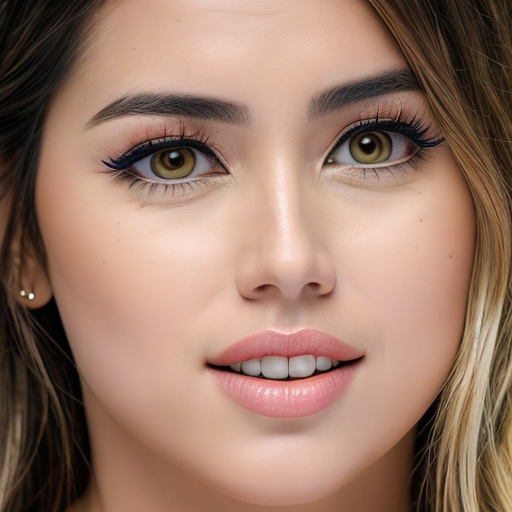

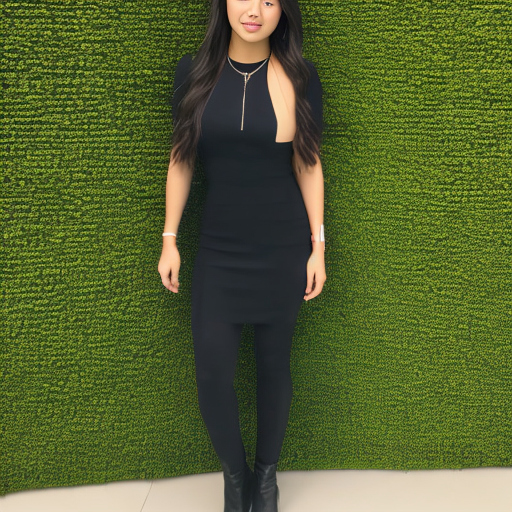

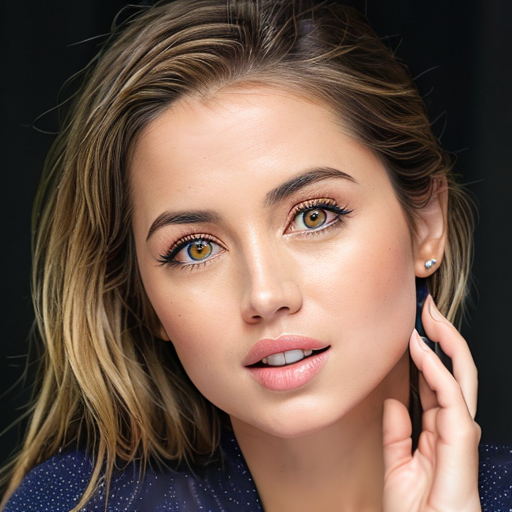

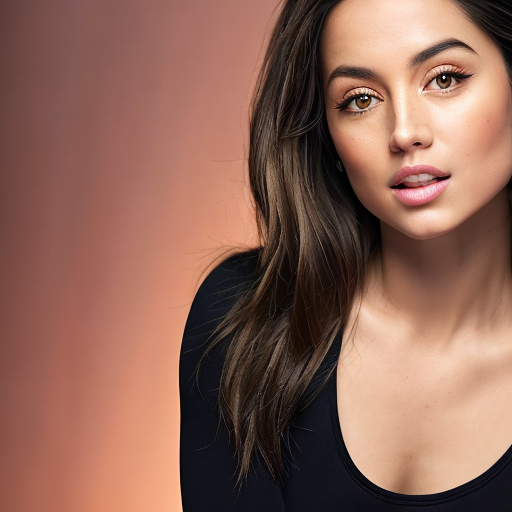

In [17]:
import random
prompt = "face portrait of zwx in the campus, realistic, hd, vivid, sunset"
negative_prompt = "bad anatomy, ugly, deformed, desfigured, distorted face, poorly drawn hands, poorly drawn face, poorly drawn feet, blurry, low quality, low definition, lowres, out of frame, out of image, cropped, cut off, signature, watermark"
num_samples = 5 # Number of samples to generate
guidance_scale = 7.5 # Guidance scale
num_inference_steps = 30 # Number of inference steps
height = 512 # Height
width = 512 # Width

seed = random.randint(0, 2147483647) # Random seed
print("Seed: {}".format(str(seed)))
generator = torch.Generator(device='cuda').manual_seed(seed) # Generator

with autocast("cuda"), torch.inference_mode(): # Inference mode
    imgs = pipe( # Generate images
        prompt, 
        negative_prompt=negative_prompt, # Negative prompt
    height=height, width=width, # Height and width
        num_images_per_prompt=num_samples, # Number of samples
        num_inference_steps=num_inference_steps, # Number of inference steps
        guidance_scale=guidance_scale, # Guidance scale
        generator=generator # Generator
    ).images

for img in imgs:
    display(img)

### Testing multiple prompts

Seed: 174255503


  0%|          | 0/30 [00:00<?, ?it/s]

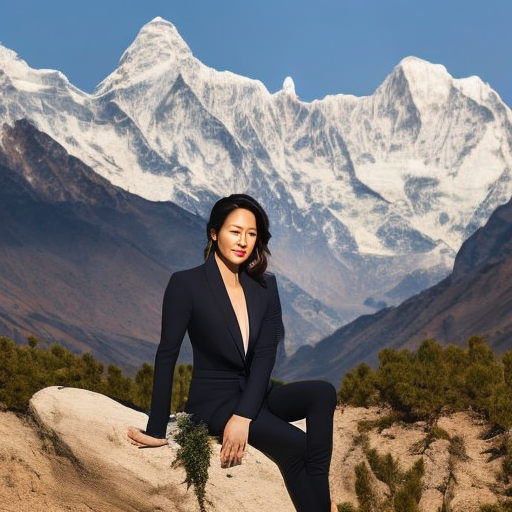

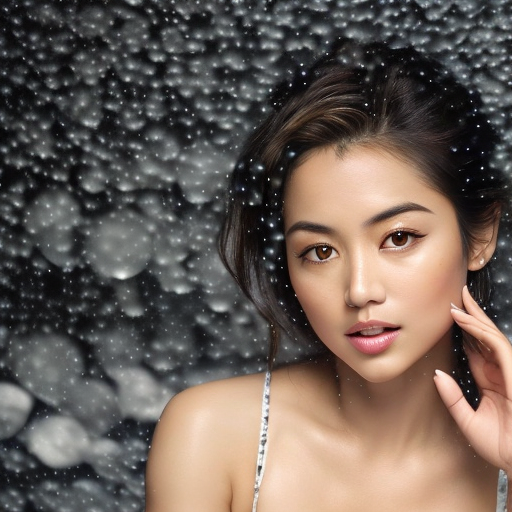

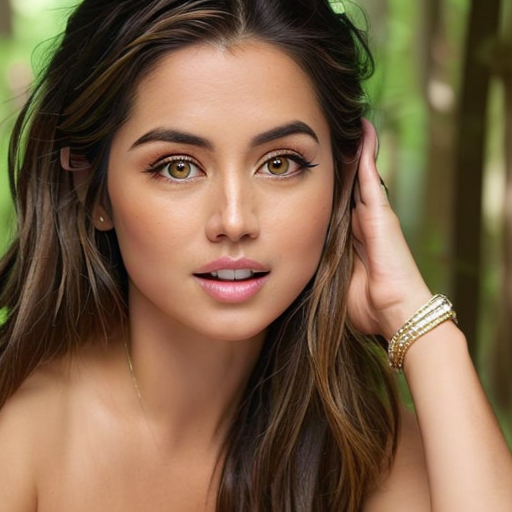

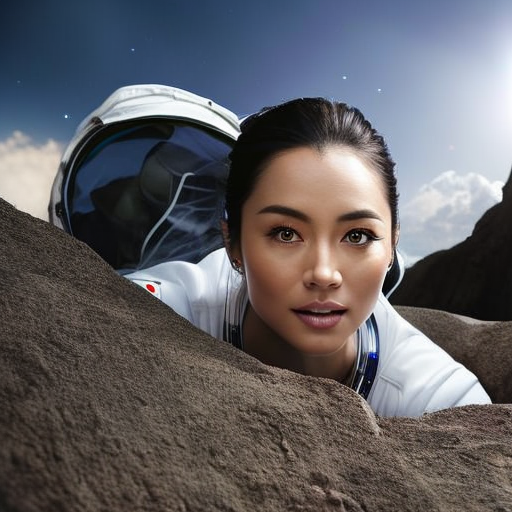

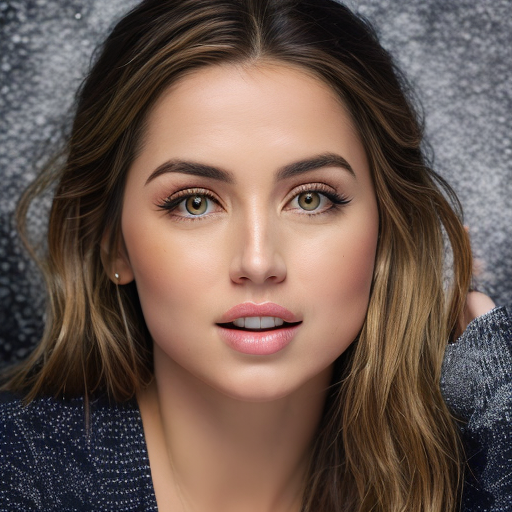

In [24]:
prompt = ["photo of zwx person, portrait, mountain himalaya in the background, evening",
          "photo of zwx person in the river, closeup, natural raining, frontal face",
          "photo of zwx person in the forest, natural lighting, frontal face",
          "photo of zwx person as an astronaut, natural lighting, frontal face, closeup, starry sky in the background",
          "face portrait of zwx in the snow, realistic, hd, vivid, sunset"]

negative_prompt = ["bad anatomy, ugly, deformed, desfigured, distorted face, poorly drawn hands, poorly drawn face, poorly drawn feet, blurry, low quality, low definition, lowres, out of frame, out of image, cropped, cut off, signature, watermark" ] * len(prompt)
num_samples = 1 
guidance_scale = 7.5
num_inference_steps = 30
height = 512
width = 512

seed = random.randint(0, 2147483647) # random value
print("Seed: {}".format(str(seed)))
generator = torch.Generator(device='cuda').manual_seed(seed)

with autocast("cuda"), torch.inference_mode(): 
    imgs = pipe(
        prompt,
        negative_prompt=negative_prompt,
        height=height, width=width,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=generator
    ).images

for img in imgs:
    display(img)

## Saving the results